In [330]:
# Final_Samples
import pandas as pd
import numpy as np
import json
import random
usable_samples_ADNI = json.load(open('./usable_samples_ADNI.json'))
PRS_orig_feature_matrix = np.load('./PRS_feature_matrix.npy').astype(np.float32)
PRS_orig_feature_matrix = (PRS_orig_feature_matrix - PRS_orig_feature_matrix.mean(0))/PRS_orig_feature_matrix.std(0)
PRS_orig_feature_matrix.shape[1], len(usable_samples_ADNI), usable_samples_ADNI
num_features=PRS_orig_feature_matrix.shape[1]
print(num_features)

34


In [331]:
num_features = 23
hidden = 4
hidden_dimension = 32

In [332]:
import os
path = "./shap/" + str(num_features)
if not os.path.exists(path):
    os.makedirs(path)

In [333]:
PRS_feature_matrix = PRS_orig_feature_matrix
PRS_feature_matrix = PRS_feature_matrix[:, :num_features]
print(PRS_feature_matrix.shape)

(1816, 23)


In [334]:
a = np.array([['a',1],['b',2],['c',3],['d',4]]).tolist()
random.shuffle(a)
a

[['d', '4'], ['b', '2'], ['c', '3'], ['a', '1']]

In [335]:
df = pd.read_csv('./COVAR_FILE_bigger_dataset.txt', ' ') 
print("shape",df.shape)
print( df[['AGE', 'PTGENDER']].shape, df[['AGE', 'PTGENDER']].dropna().shape )
print( df.head() ) # PC - Principal Component

shape (1817, 14)
(1817, 2) (1817, 2)
                FID               IID       PC1       PC2       PC3       PC4  \
0  ADNI3_036_S_6231  ADNI3_036_S_6231 -0.006724 -0.010617  0.001596 -0.000460   
1  ADNI3_006_S_6277  ADNI3_006_S_6277 -0.010432 -0.010269  0.012757  0.006921   
2  ADNI3_129_S_6146  ADNI3_129_S_6146 -0.004919 -0.011656 -0.035521  0.064641   
3  ADNI3_033_S_6352  ADNI3_033_S_6352 -0.014069 -0.010279  0.020014  0.053023   
4  ADNI3_027_S_6183  ADNI3_027_S_6183 -0.010766 -0.012370 -0.010960  0.029830   

        PC5       PC6       PC7       PC8       PC9      PC10  PTGENDER   AGE  
0 -0.013131 -0.005855 -0.005142 -0.009063 -0.001739 -0.012863         1  69.1  
1 -0.014958 -0.005860 -0.027775 -0.009632  0.054966  0.087390         1  70.7  
2  0.012094  0.003860  0.035955  0.006561  0.019736 -0.023304         1  65.5  
3  0.023691  0.000247 -0.002273 -0.030627 -0.053461  0.049984         0  71.4  
4 -0.019520 -0.001955  0.023844  0.079138  0.002207  0.008892         0  65.

In [336]:

# # COVAR_FILE = df.to_numpy()[:, 2:].astype(np.float32)
# cnt = 0

# print("shape1",PRS_feature_matrix.shape)
# FEATURE_MATRIX = np.concatenate([PRS_feature_matrix, np.zeros([PRS_feature_matrix.shape[0], 12])], 1).astype(np.float32)
# print("shape2",FEATURE_MATRIX.shape)
# for sample in usable_samples_ADNI:
    
#     covar = df[df['IID'] == sample].to_numpy()[:, 2:].astype(np.float32) # taking from the PCs, skipping the first two columns of IID, FID
# #     if cnt < 2:
# #         print(covar)
#     if covar.shape[0] == 0:
# #         print(sample)
#         cnt += 1
#         continue
# #     FEATURE_MATRIX[usable_samples_ADNI[sample], 23:] = covar
# # cnt/FEATURE_MATRIX.shape[0], FEATURE_MATRIX[:2], PRS_feature_matrix[:2]

#     FEATURE_MATRIX[usable_samples_ADNI[sample], num_features:] = covar # naeem's modification
# cnt/FEATURE_MATRIX.shape[0], FEATURE_MATRIX[:2], PRS_feature_matrix[:2]



# COVAR_FILE = df.to_numpy()[:, 2:].astype(np.float32)
cnt = 0
FEATURE_MATRIX = np.concatenate([PRS_feature_matrix, np.zeros([PRS_feature_matrix.shape[0], 12])], 1).astype(np.float32)
for sample in usable_samples_ADNI:
#     covar = AGE_GENDER_PTID_map[AGE_GENDER_PTID_map['PTID'] == '_'.join(sample.split('_')[1:])].to_numpy()[:, 1:].astype(np.float32)    
#     print(covar[0])
    covar = df[df['IID'] == sample].to_numpy()[:, 2:].astype(np.float32)
    if covar.shape[0] == 0:
#         print(sample)
        cnt += 1
        continue
#     print(covar[0])
    print(FEATURE_MATRIX[usable_samples_ADNI[sample]])
    FEATURE_MATRIX[usable_samples_ADNI[sample], -2:] = covar[0, -2:]
#     print(FEATURE_MATRIX[usable_samples_ADNI[sample]])
    print('\n')

print(FEATURE_MATRIX.shape)
# cnt/FEATURE_MATRIX.shape[0], FEATURE_MATRIX, PRS_feature_matrix


[ 0.60254073  0.386112   -0.58913165 -0.562066    1.3769143   1.1957877
  0.6754952  -0.8120152   1.4735116   1.5833879   1.1038882   0.04730371
 -0.25817478  2.076811    0.0348923   1.5471818   0.21130602 -0.78878814
  1.1477689  -0.7139022   0.6559201   0.03603589 -1.020881    0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.03202357 -0.7218221   0.5600816  -0.45909986 -0.2828379   0.69074273
  0.8752286   0.21927162 -0.3769702  -0.454362    0.72349036 -0.4975085
  1.0644186   0.5975366  -0.24813785  0.02896876 -0.02788699  2.6224835
  0.43087134 -0.28895292  0.24560858 -0.05211082 -0.04476365  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 1.0080625  -0.27124533 -0.50296485  0.6459284  -0.21688773  0.2554433
 -0.54420847 -1.4526482   1.3420434   1.4525458   0.62010205  0.01753278
 -0.25548542  0.12015907  0.4208

  0.          0.          0.          0.          0.        ]


[-1.0082719   0.10347393 -1.2720883  -0.20248197  0.6969825   1.7618151
  0.7451121  -0.13329178 -0.5167575   0.5041935   0.9039656  -0.26485446
 -1.2325625  -0.37270185 -0.28116342 -1.0529885   0.39248118 -0.4373191
  0.95142084  0.9576574   0.57779473 -0.02512794 -0.40197426  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.94177145 -0.5597709  -0.5995154  -0.49926546  1.0573472   0.28745458
  0.2978292   0.6684926  -1.1068077  -0.4728622  -0.20697314 -0.86888224
  0.40028864 -0.38975063 -0.8532806   1.0264812  -0.3574327  -0.32666302
  0.5433338   0.33780417  1.5026487   0.37086356  0.8669412   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.24066629 -0.4965877   0.43799612 -0.31674144 -0.28329265 -0.7682438
 -0.53410137 -1.4709532  -0.83404595  0.

  0.          0.          0.          0.          0.        ]


[ 1.2180429   0.02185911 -1.2736427  -0.02142757  1.3662658  -0.7596706
  1.0945671  -1.795183    0.5272424   0.60593444  0.35073102  0.16234785
 -0.03327121 -0.11833165  0.11953849  1.0851059  -0.6657467  -0.89397216
  0.02091853 -0.29700616 -0.4191164  -0.18551499 -1.0068313   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.9834594  -0.38922343 -1.0279696   0.5938164  -0.87925774  0.45919213
 -0.29768658  1.1451417  -0.42677212  0.79597056  0.33378178 -0.3629754
 -0.02378266 -0.5193838  -0.0323731  -1.3811276   0.36951563 -0.27477464
 -0.5267602   0.63588506  0.40210396 -0.05635291 -0.74727017  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.6526514  -0.6784937   0.4330528  -0.17371018 -0.3170507   0.28965634
 -0.6416715   0.1565024  -1.3133398   0

[-0.1750086   0.2740447  -0.04275628 -0.93334013  0.10612284  1.1043916
  0.13795047  1.0737996  -0.47226998 -1.4450152   0.14945626 -0.7445445
 -0.18634373 -0.63589686 -0.80656046 -0.03752597  0.2859989   0.84072
  0.2629364   0.9171009  -0.12137344 -0.30040354  0.20262052  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.27303782  0.32576025 -1.789081   -0.18714255 -0.37428114 -0.61800325
 -0.86363524 -0.31337696  0.11815313  1.1226574   0.4181357   0.14892715
 -1.4193484  -1.2099766  -0.15167683 -0.43112198 -1.0850339  -0.42156136
 -0.44985208 -0.5050627  -0.08774519  0.01334484  1.4750893   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.9083465  -0.25290772 -0.15698987  0.33676884  0.614071   -0.00767953
  0.73984855 -0.9387187   0.31846234  0.23913169 -1.4366701   0.70120996
 -0.08983067 -0.45723504  0.07410

  0.          0.          0.          0.          0.        ]


[ 0.2400139  -0.8459963   0.4115364  -0.4935799   0.3103414  -1.2722937
 -0.39459124 -0.30685523 -0.02974426 -0.5117319  -1.3759749  -0.8657292
  0.48503795 -1.070467   -0.41046083  0.71594673 -1.4575636   0.87336415
 -0.7910055  -0.3083056   0.07188089 -0.2319046   0.4075988   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 2.797147   -0.64105433 -0.7014972   0.0079242   0.4525894   1.7485608
 -1.3937098  -0.8241251  -0.8573367   2.4405591   2.6855242  -0.6046246
  0.85289896 -0.7512182  -0.41613528  0.28612983  0.39958936 -0.75511694
  0.5152518   0.31802398  0.4760688  -0.5549854   0.98412365  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.6947514  -0.04356677 -0.994431   -0.83735615 -2.1146538   2.2764974
 -0.9916099  -1.044233   -0.25347033  1.14

  0.          0.          0.          0.          0.        ]


[ 0.306758   -0.9774812  -0.99987924 -0.8019546   0.09838189 -1.4235175
 -0.12264156  0.21275246 -0.19743425 -0.08489879  0.10885862 -1.3503454
 -0.55325735  0.08627123 -1.1194856   2.0180473  -0.32320634 -2.714581
  0.7454902  -0.27188432  0.15788677 -1.18019     1.7749671   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-1.2548412  -0.45447668 -1.1746936  -1.030572   -0.38640076 -1.4668076
  1.4261246   0.3016192  -1.3426667   0.9344742   0.21782093 -1.3104589
 -2.4839158  -0.50487113 -0.3389777   0.18112545  0.46016103 -3.3894095
  0.0445753   0.08107039  0.9341917  -1.0494803  -0.79094267  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.9140641  -0.37362516 -0.38004234 -0.09564608 -1.0284091   0.5366762
  0.23553775  1.0509232   0.7336209  -1.57314



[-1.6923435  -1.2290397  -0.9535617  -0.38607976  0.07252415  0.7220586
  0.39656097  0.52612287 -1.102612    0.81549156 -0.7834226  -1.2101314
 -0.9813585   0.8991499  -1.0966452  -0.2777413   0.16894461 -0.43118098
  0.31203544 -1.4736749  -0.12376644 -1.0756149  -0.22769314  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-7.0949435e-01 -8.6267096e-01 -1.9452946e+00 -6.6981548e-01
 -9.1668524e-02 -2.3071705e-01  1.8091550e-03  1.5478441e-01
  1.3114962e-01  8.4514189e-01  6.6580921e-01 -1.2445775e+00
 -1.9632533e+00 -2.1397436e-01 -7.6750219e-01  1.8092802e+00
 -1.1877316e-01 -3.8000500e-01 -4.6093675e-01  8.6389399e-01
 -1.7951508e-01 -1.3129594e+00  1.1470791e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00]


[-0.02301782 -1.2777557  -0.47609958 -0.84100187  

  0.          0.          0.          0.          0.        ]


[-0.76951605 -0.8729324  -0.67775035 -0.9158859  -0.7115773   0.01443886
 -0.75956136 -0.40459174  0.8401205  -0.29860845  1.2627175  -1.2446787
 -0.3110073  -0.39051682 -0.86813456  1.0203332   0.08989978  0.82589906
  0.18078907 -1.5042727   0.25008023 -0.94303936  1.5945299   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.543416   -0.91159666  0.11276635 -0.3418562   0.38812122 -0.20084159
 -0.14385353 -0.67531747  0.99264044  2.114651    1.741714   -0.28918853
 -1.2793056  -0.8369124  -0.7162205  -1.5083765  -0.01398549 -1.7761872
 -0.39512688  1.3080124  -0.01266858 -0.25221035 -0.17114948  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 1.9426608e-01 -6.2207472e-02  1.2526842e+00 -1.0218081e+00
  8.4733135e-01  2.0005291e-03  1.3945131e+00  3.64

  0.          0.          0.          0.          0.        ]


[ 1.5144556  -0.09650865  0.00268094 -0.37605977 -0.4029227   0.09904916
  0.0541239   2.3230224   0.68695647 -0.95959866  0.60443276 -0.54231924
 -1.3356992   0.93177724 -0.5120581  -1.0531512   1.9836315   0.92226183
 -1.3134577   1.374651   -2.604448   -0.70744914  0.5022042   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.20727286 -1.0181967   1.363192   -0.801881   -2.4264717  -0.34665793
 -1.1540885  -0.32066432  0.7637612  -0.38068086 -1.2808136  -1.6212237
  0.8579481  -1.3459511  -0.969768    1.7632984  -2.3581371   1.2181938
  0.64556843 -0.48946756  0.22533846 -1.2686275   0.48066652  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.29456568  0.20996681  0.98322576 -0.39318085 -1.3744017   0.4601094
 -0.70647115 -0.6059799  -0.10977852 -0.

  0.          0.          0.          0.          0.        ]


[ 0.37618977 -0.80046636 -1.2544252  -0.29383475  0.49822655 -0.47182965
  0.43864244  0.93743074 -0.28092167 -1.668104   -1.6130784  -0.43631473
 -0.11112911  1.1935376  -1.1232655   0.36329618  0.23012346 -1.6894662
  0.5334878  -0.04957504 -0.385623   -1.0864211  -0.31624094  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.50568557 -0.7290583   1.0623006  -0.74247026  1.441528    1.7133441
 -0.77655345 -1.0330579  -0.18634543 -0.7872429   0.2837289  -1.0775644
 -1.3883187   2.210917   -0.520715   -2.5113971   2.2601209  -0.183831
 -1.1243392   1.6113217  -3.368153   -1.0818592   0.86949515  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.31140304 -0.2950884   0.01638295 -1.0541139  -0.1879601  -1.4170585
  0.52634245  0.84262735  0.72721887  0.111

  0.          0.          0.          0.          0.        ]


[-0.13983257 -0.9868864   0.57456195 -0.6118353  -0.8307881  -0.51186615
 -0.7447631   0.21848592 -0.4706494  -0.6040568  -0.6119999  -0.3630315
 -0.05524923  0.9457804  -1.3158863   1.1113379  -0.16135727 -0.202848
  0.22748423 -0.57462424  0.2576761  -1.0951213  -1.0563544   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.17700388 -0.41434702 -1.2048125  -0.8354467  -0.18125364  1.6679361
 -0.12261014 -0.96793383 -1.4158269  -0.11617248 -0.20072813 -0.60625607
 -0.2024857   1.7300618  -0.79913306  0.28538468  0.65251184  0.53271955
  0.60883945 -0.26446873  0.05219607 -0.5821876   0.98609376  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.22341801 -0.431564   -0.80725735 -0.53268534  0.3843832  -0.594053
 -0.14363559 -0.01224481 -1.7683237  -0.460

  0.          0.          0.          0.          0.        ]


[ 0.36612797 -0.3181464  -0.40005046  0.26489988 -0.43962243 -1.2024649
 -0.6216276  -0.8280035   0.88555723 -1.0029776  -0.7801917   0.05896175
 -0.58521914  1.0069954  -0.8453799  -0.16684861  0.9509097  -0.16129105
 -0.6420592   2.5577645  -2.3831646  -0.32258123  0.61839825  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.50476855 -0.9672396  -0.16201968 -1.15285     1.5757219   1.2654294
  1.3955308  -1.1019844  -0.36154535  0.24710485  1.2270746  -1.2590989
 -2.0759182  -0.22796199 -0.5992691   0.3506773  -0.16204125  1.2283022
 -0.7560847  -0.47805566 -0.4521697  -0.87046057 -2.0624173   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.8579724  -0.06315412 -0.16904865 -0.40856045 -2.9069474  -0.18672426
 -1.9959743  -1.1553283  -0.96222246 -0.3

  0.          0.          0.          0.          0.        ]


[-0.22485271 -1.3639942  -0.6764545  -0.2659348   0.05862463  3.1312964
 -0.71460193 -0.9082807  -0.8974625  -0.24169354  0.35670763 -0.4612555
 -0.65137196  0.4367108  -0.67958224 -2.055215   -0.33469406 -0.20507659
  0.7944598   0.3742828   0.0741725  -1.049612    1.219347    0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 1.7325834  -1.5622901   0.42939615 -0.5720892  -0.25963002  0.49460953
  0.54304075 -0.11074822  2.5476098   0.5235095  -0.07858423 -1.2038181
 -0.8133216  -0.4929204  -0.8582365  -0.27443534  0.0205269   1.1829667
 -0.41368872 -2.4453955   0.68369335 -0.5765372  -0.71841526  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.88574976 -0.18431331 -2.50689    -0.6805568   1.3390274   0.5103857
 -0.42784938 -1.791272   -0.6730136  -1.07

  0.          0.          0.          0.          0.        ]


[ 0.20663622  1.0803806   0.87917066  0.775769    0.41902596 -0.19235347
  2.2455006  -0.29537734  0.32433465  0.10931043 -0.21869929  0.5033137
 -0.801682   -1.736292    1.1909783   1.0180702  -1.9822135   0.6331771
  0.29590058 -1.46141     0.0554554   1.0013795  -0.720699    0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-1.215343    0.4279858   0.10617986  0.47517905  1.1655865  -0.68469536
  0.47794056 -0.60714954 -0.24255602 -0.06811619  0.4359417   0.39350522
  1.7537365  -1.6095015   0.5623546   0.31223062 -0.88870287 -0.5000347
 -0.27572486  2.741754    0.93488985  0.4583038  -1.2337911   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-1.3984994   0.69313264  0.5056658   0.9245093  -0.54962945  0.41883737
 -0.8040814   0.18035118 -0.5149656  -0.

[-0.2745046   0.90442455  0.24829638  0.19840305  1.3354509  -0.3510697
  1.1658478   1.3165635   2.4081743  -1.0809917  -0.7305311   0.7264344
 -1.3374774   0.02312194  0.54008764 -0.42307898 -1.1904666  -0.4971432
 -0.63801295 -1.6857913   1.1705397   0.42877972  1.5572582   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.67504185  1.2877841   0.16529755 -0.01085683  1.3819714  -0.41271558
  0.39631823  0.25090218  1.6598043   0.5357869   1.3015501   0.7832171
 -1.4113384   0.09526023  0.6717916   0.60728574  0.04215895 -0.32522598
  0.6388137  -0.12580621 -0.44660395  0.712411    0.709045    0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-1.8721857   0.1704883   0.56493396  0.40760297  0.3565343   0.18845013
  0.30564886  1.3516752  -0.29354113 -1.5859209  -0.9301852   0.4783499
 -0.8658692   1.5781429   0.44567

  0.          0.          0.          0.          0.        ]


[ 0.5524858  -0.31865373  0.37561837  0.18304352 -0.03577119 -1.3034998
  0.5864233   1.4491563  -0.45157936 -2.2842722  -0.48784325  0.27645454
 -2.4057484   2.2603865  -0.05975815  0.4909204   2.0583763   0.6176597
 -0.37704208  1.0633802  -2.154291   -0.25326568  0.1107484   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.22849657  2.1505935   1.5998138   1.5177369   0.69163996  0.3377055
  0.64466226 -0.26654866  0.58598316  0.07280193  0.420995    1.8562666
  0.24687622 -0.200878    2.0838509   0.10022474  0.41070527 -0.9903689
 -0.10997353  0.6746694  -1.1094072   1.8251799   0.0495971   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.60284346  0.42450258  0.30497918  0.4317388   0.60743314  2.4776943
  0.659743   -0.7342857   1.019256   -3.085

  0.          0.          0.          0.          0.        ]


[-6.3641280e-02  2.0125520e+00  2.9662395e-01  1.4580716e+00
  3.0911993e-04 -9.3154973e-01 -8.4355325e-01  9.6229249e-01
  1.1254404e+00  2.3872474e-02 -1.1209045e-01  1.6965816e+00
  6.2761748e-01  5.6369323e-01  1.7577717e+00  4.6201080e-01
  6.5666455e-01 -6.4648670e-01 -9.4345248e-01  8.2795858e-01
  1.9047543e-01  1.9474981e+00  2.5292602e-01  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00]


[-0.68595695  0.78205204  0.45490423  0.39624748 -0.03863189  1.1680509
 -0.49721944 -0.16129269 -0.74710166 -0.6040076  -0.2675961   0.7062286
  1.7536185   0.05563558  0.9327182   1.867661    0.83688307 -1.649248
  0.29022053 -1.2462796   0.49716958  0.64420533  0.30022416  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.  

  0.          0.          0.          0.          0.        ]


[-1.1407037   0.20909606  0.590017   -0.5985901  -0.637986    0.9927255
 -1.3082733   0.24462913  0.19095054  1.5570498  -1.0371038   0.08646431
  0.602344   -1.6929874  -0.4186128  -0.9859918  -0.6884899  -0.35065225
  0.17430016  0.46311674  1.0501472  -0.12352409 -0.9240363   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-1.563374    0.61041534  0.9026165   0.14709134  0.3537642   0.74581486
  1.0406388   0.04951844  1.6687068  -2.2745612  -1.7897654   0.34324113
 -1.0785224   1.3851696   0.3016826  -0.12708203  2.9682784   0.88961244
 -1.4476539   1.5954335  -1.6305455   0.15896752 -1.0550222   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.72220385  1.4506602   0.9983597   0.5477058  -1.0429837  -1.4895488
 -2.5681438   0.2740295  -0.1923409  -1

  0.          0.          0.          0.          0.        ]


[ 0.04271163  1.0965685  -1.5212843   0.5040805   1.1663895  -2.1155217
  1.076899    0.17566177  0.03904253  0.06432044 -0.29688045  0.8617778
  0.25366333  0.67753375  0.6804171   0.94966745 -0.29765883 -0.04199967
 -0.8654526   0.6419059   0.13464603  0.6469343   0.9811795   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 1.9410747   0.43405172  0.5089255  -0.05647329 -0.10536884  0.28392628
 -0.9351116   0.8665286  -1.4256628   0.00344558 -0.16218463  0.5973649
  0.28025317 -1.0490261   0.10030687 -0.33261806 -0.9335421  -0.48488808
  0.53754    -0.21943592  0.36401993  0.15546776 -0.552988    0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.6133367   0.42535895 -0.28942734 -0.1940576   0.18601851  0.6502399
 -0.1752115  -1.2312945  -0.00846814 -1.5

  0.          0.          0.          0.          0.        ]


[-4.1828948e-01 -2.1472663e-01 -1.3553606e-01  1.3708566e-01
  7.3315185e-01 -5.5108227e-02  7.2921109e-01  1.3288302e+00
  1.2578501e+00 -1.1936368e+00 -2.6636310e-03 -1.5358274e-01
 -4.6657699e-01  1.1018698e+00  5.6989366e-01  5.9158243e-02
  1.8030287e+00 -3.7214577e-01 -2.1560223e-01 -8.9284919e-02
 -2.9704740e+00  1.1038255e-01  3.4176946e-01  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00]


[-1.1236119e+00  4.7925174e-01  1.6855812e-01  5.9763074e-01
  3.4044722e-01 -4.2390132e-01  1.1254441e+00  2.0491269e-01
  1.1486704e+00  1.1594980e+00  2.5915086e+00  2.6120132e-01
  8.0631423e-01 -2.2295758e-03  3.0725810e-01  1.0914669e+00
  4.2594767e-01 -6.3264185e-01  5.6770688e-01 -9.5519684e-03
  9.8711395e-01  2.1448052e-01 -1.3757780e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0

[-0.3293941   1.5020062  -0.5157738   1.5188987  -2.2298756   0.64496255
 -0.39554617 -0.43599033  0.32950708  0.7656192   1.6588775   0.96410245
 -0.51908594 -0.6859764   1.4351852  -0.36174425  1.0793446  -1.3593056
 -0.26439014  2.166372   -0.76371783  1.3221581  -0.6069314   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.18894985  1.4479951  -1.5979525   0.60464567 -0.17753111 -1.3126537
  0.3481592   0.8411359  -0.26256135  1.7824957   2.37089     1.1736006
  1.6154795   1.1119897   1.0531418   3.0352612  -0.16402763 -0.13126288
  0.05426249 -1.7463119  -0.34034383  0.8348731  -0.88310707  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.40299144  0.8185376  -0.32632273  0.27460667 -0.43947375 -1.1126274
 -0.25437215  0.15148175 -0.90283495  0.52443594  0.3719537   0.9827987
 -1.3551939  -0.72572803  0.57129

  0.          0.          0.          0.          0.        ]


[ 1.0808781  -0.28633666  0.83913314 -0.324807    1.0296942  -0.24454536
  1.4337884   0.7756257  -0.13400446 -0.03601854 -1.1596296  -0.50892895
 -0.4034471  -0.35290056  0.10693352  0.23109753  0.16653274  0.70251244
 -0.02770077 -1.3572007   1.063753   -0.23500146  0.9042751   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.24800332  0.18643744 -1.2777654  -0.53785753  1.0941052   0.16673355
  1.1672175   0.0581334   0.8939966   0.20321758 -0.94792926 -0.7073272
 -1.9288409  -0.19935355 -0.03295151  1.5839232  -0.5547184  -0.6279705
 -0.33052698 -0.23604599  0.40244025 -0.07269067  0.2660361   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-2.0039403   1.5700136   1.7694954   1.1058964  -0.58907133 -1.5729903
 -0.1908034   0.3320002   0.4550555   0.

  0.          0.          0.          0.          0.        ]


[-0.5592382   0.3120532   0.4756281   0.23635052 -0.21959531 -1.5633914
 -1.109151    1.8579826  -0.02478722  0.11052383  0.40750372  0.6459507
  0.6295564  -0.06427101  0.3087172   0.59465915 -0.24498037 -0.36848915
  0.05312566 -1.0158      0.6116338   0.13328138 -0.3433592   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.8657886  -1.1079583  -0.13267003 -0.44458953  0.38440236 -0.40220174
 -0.03421004 -0.3128963   1.843306    1.7082571  -0.25633445 -1.3965623
 -0.92664593 -0.84174454 -0.23416913 -0.20266733 -0.63372564 -1.7792715
  0.34464192 -0.5227491   0.5226989  -0.9799069   0.9499199   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-3.2022446e-01  2.8339610e-01 -1.8087268e-02 -1.3480593e-01
 -5.0276762e-01 -2.2865958e+00 -3.7924343e-01  1.3244

  0.          0.          0.          0.          0.        ]


[-1.6943781  -0.14166756 -0.28399515 -0.21104026  0.84263927  0.50909805
  0.97883135 -0.22110629  0.773232   -1.0651355  -0.02893391 -0.12403373
 -0.51768607  0.472709    0.3304665  -0.0717002   0.20498878 -1.4960098
 -0.81228745 -1.0960897  -0.39115003  0.07198428  1.2838236   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-1.6541072  -0.4023652   0.61880714 -0.09775308  0.4574606  -1.1937382
  0.09548721 -0.78281057  2.2078135  -1.5581522  -1.5405436  -0.2112823
  1.2828782  -1.0324101   0.05785495  1.4602326  -0.9679106   1.7132038
  0.37515792  0.15461586 -0.06412805  0.06632128  0.24147628  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.88075    -0.20936453 -0.02263258 -0.42032146 -0.55400556 -1.1480534
  0.6621793   0.88855505  0.22372817 -0.05

  0.          0.          0.          0.          0.        ]


[ 1.1315379   0.24312708 -2.1644447  -0.43336695  0.59617203 -0.40336764
 -0.5107213   1.1242915  -0.84403974 -0.7128116  -0.64065474  0.17400078
  0.48319325  1.9456322  -0.17317809 -0.3339013   0.40029618  0.5022336
 -0.63459015 -1.0844098   0.41752404  0.24305093 -0.95708257  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.0466671   0.27856863  0.0443544   0.8238418   0.20299658 -0.1599198
  0.9110219   1.3729318  -0.4635751  -0.57814497  0.6651383   0.63441265
  0.350193   -0.25667778  0.8647872  -0.21003781 -0.16904478 -0.46461535
 -0.572015    0.07288039 -0.6217352   0.0996501   1.2024434   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-1.4512844   0.4516231   0.6065088   0.09774844  0.5148146  -0.0469377
 -0.10334447 -0.84475595 -1.3184079  -0.

  0.          0.          0.          0.          0.        ]


[ 0.227354    6.111734    3.1305366   5.5451045  -0.13469048 -0.19383104
 -0.3221166   0.12982033  0.13392302  0.5870571   0.31621322  5.9716783
  1.3625902  -4.284792    4.5321584  -1.7274343   1.3769388  -3.754019
  0.17414789  2.8075004  -0.27878046  4.6052914  -0.44148552  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.31854814  0.23953806 -0.71843034 -0.42914698 -2.1903894   0.36473054
 -1.3952746  -1.7455931  -0.4644281   0.31556755  0.45749468  0.20761278
 -0.08485351 -0.7613242  -0.12128489 -1.5611      0.20940195 -0.11523239
 -0.10627217 -1.0932434  -0.25433284 -0.10379759 -1.0015228   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 1.0081685   0.23382746 -0.27901503 -0.17714128  0.70061517  0.5159576
  0.607046   -0.32516003 -0.76273084  0.0

[-0.46266234 -0.64804816 -0.07939371  0.13114086  1.1495315   0.7602296
 -0.229143   -0.01936568 -0.10588185  0.32827953  0.24902529  0.18917105
  0.04891457 -0.01727537 -0.69890434  0.10070374 -0.42082846  1.3156804
  0.01425383 -0.59417844  1.8405634  -0.52800065  0.9571009   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.1455152  -0.45435044  0.9012323   0.0909126   1.4890932   1.5486736
  1.2786784  -1.043908   -0.44876212  0.5706968   0.7774863   0.06659991
  0.13772582 -0.22274189 -0.1418179   1.3142308  -0.52317816  1.9801089
 -0.617001   -0.59835565  0.56490934  0.09982911  1.5862788   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[-0.518389   -0.2597835  -1.5021482  -1.1007805  -0.1928538  -0.2714601
 -0.7662791   0.09385156 -0.09105001 -1.0267783  -1.964171   -0.97127503
  1.245686   -0.5342375  -0.31142

  0.          0.          0.          0.          0.        ]


[-0.43647376  0.7057537  -0.02938301  0.20562498  1.437      -0.12614618
  2.7863665   0.07925995  1.443555   -2.0751047  -1.0468686   0.5054504
 -1.6642295   0.01195479  0.29313672 -0.90823966  1.029627    0.30764246
 -0.94174975  0.5295317  -0.13253573  0.73393315 -1.3178176   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[  1.138584     7.0128746    3.793621     8.412953    -2.5372338
  -0.132929    -0.03121267  -4.155633     2.664397    -2.6617947
  -1.6360248    7.629857     3.9087188   -2.1436405    7.810875
   1.1202271    0.86039513   0.96483696 -10.063119     0.6674335
   0.11632773   8.255667     3.57136      0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]


[ 1.3894182  -0.07387175 -2.0568264  -0.63457793  0.39502874 -0.12109935
  0.063

  0.          0.          0.          0.          0.        ]


[-0.8075475   0.06920382 -0.14659382  0.30877942 -0.66832006 -0.4657704
 -1.165903    0.5382763   0.27631894 -0.5150811   0.11422622 -0.21839838
  0.09494954  0.36136034  0.07854589  1.5356624  -0.47304922  1.2827072
  0.06315248 -0.09219215  0.9508521   0.39544216  1.8793211   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.18231404  0.01224051  0.99711174  0.21593273 -0.15676722 -0.0563917
 -0.4010406   0.51410204  0.27115285 -0.08953921 -0.29325736 -0.29054546
 -0.13638395  0.62507135  0.09179505 -0.8854399  -0.6271564   1.4987041
  1.2788082  -0.25283635  1.6139594  -0.03583833  0.23873052  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


[ 0.48429394  2.219108    0.33940354  1.8500489  -0.9032249  -1.0915076
 -1.3975542  -0.14712867  1.7519269  -0.31

In [337]:
!conda list

# packages in environment at /home/naeem/anaconda3/envs/ad_venv:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2022.05                  py39_0  
_libgcc_mutex             0.1                        main  
_openmp_mutex             5.1                       1_gnu  
aiohttp                   3.8.1            py39h7f8727e_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  custom                   py39_1  
anaconda-client           1.9.0            py39h06a4308_0  
anaconda-project          0.10.2             pyhd3eb1b0_0  
anyio                     3.5.0            py39h06a4308_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h7f8727e_0  
arrow                     1.2.2              pyhd3eb1b0_0  
astroid                   

In [338]:
def save_in_file(model_name, accuracy):
    model_file = open("model_details.txt","a")
    model_file.write(model_name + " -> accuracy : " + str(accuracy) + "\n" )
    model_file.close() 

In [339]:
if True:   
    def warn(*args, **kwargs):
        pass
    import warnings
    warnings.warn = warn


import os
import time
import sys

import torch as t
from torch import nn
from torch.autograd import Variable

feature_indices_to_consider = list(range(num_features))+[33,34]#list(range(35)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]
hidden = 4
class simple_model(nn.Module):
    def __init__(self, num_features=FEATURE_MATRIX.shape[1], hidden_dim=32*4, drop_probab=0.3):
        super(simple_model, self).__init__()
        
        ####
        self.drop_probab = drop_probab
        self.dropout_feature = nn.Dropout(p=0.3)
        self.fc1 = nn.Linear(num_features, hidden_dim)
        self.dropout1 = nn.Dropout(p=self.drop_probab)
        num_hidden = hidden
        self.fc_hidden = nn.ModuleList([nn.Linear(hidden_dim, hidden_dim) for i in range(num_hidden)])
        self.dropout_hidden = nn.ModuleList([nn.Dropout(p=0.0) for i in range(num_hidden)])
        self.fc2 = nn.Linear(hidden_dim, 8)
        self.dropout2 = nn.Dropout(p=0.3)
        self.outLayer = nn.Linear(8, 1)
#         self.softmax = nn.Softmax(-1)
        self.sigmoid = nn.Sigmoid()
        self.num_hidden = num_hidden
        ####

    def forward(self, features):
        features = self.dropout_feature(features)
        features = self.fc1(features)
        features = self.dropout1(features)
        for i in range(self.num_hidden):
            features = self.fc_hidden[i](features)
            features = self.dropout_hidden[i](features)
        features = self.fc2(features)
        features = self.dropout2(features)
        logit = self.outLayer(features)
#         print(features.shape, features)
        probab = self.sigmoid(logit)
        return probab
    

In [340]:
# if True:
#     def warn(*args, **kwargs):
#         pass
#     import warnings
#     warnings.warn = warn


# import os
# import time
# import sys

# import torch as t
# from torch import nn
# from torch.autograd import Variable

# # feature_indices_to_consider = list(range(23))#list(range(35)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]
# # naeem modified
# feature_indices_to_consider = list(range(num_features))#list(range(35)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]


# class simple_model(nn.Module):
#     def __init__(self, num_features=FEATURE_MATRIX.shape[1], hidden_dim=32, drop_probab=.8):
#         super(simple_model, self).__init__()
        
#         ####
#         num_hidden = hidden
#         hidden_dim = hidden_dimension
#         self.fc1 = nn.Linear(num_features, hidden_dim)
#         self.fc_hidden = nn.ModuleList([nn.Linear(hidden_dim, hidden_dim) for i in range(num_hidden)])
#         self.fc2 = nn.Linear(hidden_dim, 8)
#         self.outLayer = nn.Linear(8, 1)
# #         self.softmax = nn.Softmax(-1)
#         self.sigmoid = nn.Sigmoid()
#         self.num_hidden = num_hidden
#         self.drop_probab = drop_probab
#         self.dropout = nn.functional.dropout
#         ####

#     def forward(self, features):
#         features = self.fc1(features)
#         features = self.dropout(features, p=self.drop_probab)
#         for i in range(self.num_hidden):
#             features = self.fc_hidden[i](features)
#         features = self.fc2(features)
#         features = self.dropout(features, p=self.drop_probab)
#         logit = self.outLayer(features)
# #         print(features.shape, features)
#         probab = self.sigmoid(logit)
#         return probab
    

In [341]:
import json
import numpy as np
import random

In [342]:
Final_Samples = json.load(open('Final_Samples_4yrs.json', 'r')) 
len_positive_samples = 0
len_negative_samples = 0
for x in Final_Samples:
    if x[1] == 1 :
        len_positive_samples += 1
    else :
        len_negative_samples += 1
        

In [343]:
# Final_Samples = json.load(open('Final_Samples_6yrs.json', 'r')) 

# positive_samples = Final_Samples[:len_positive_samples]
# negative_samples = Final_Samples[len_positive_samples:]
# #     random_seed = None
# if random_seed is not None: 
#     random.seed(random_seed * 2)
# random.shuffle(positive_samples)
# random.shuffle(negative_samples)
# Final_Samples = positive_samples[:320] + negative_samples[:320]
# #     print(len([x[1] for x in Final_Samples if x[1] == 1]), len([x[1] for x in Final_Samples if x[1] == 0]))
# #     Final_Samples = np.array(Final_Samples)
# #     Final_Samples.shape
# #     # Final_Samples.reshape(10, -1, 2).shape
# #     Final_Samples = json.load(open('Final_Samples.json', 'r')) 
# #     positive_samples = Final_Samples[:654]
# #     negative_samples = Final_Samples[654:]
# #     if random_seed is not None: 
# #         random.seed(random_seed * 2)
# #     random.shuffle(positive_samples)
# #     random.shuffle(negative_samples)
# #     Final_Samples = positive_samples[:500] + negative_samples[:500]
# if random_seed is not None: 
#     random.seed(random_seed)
# random.shuffle(Final_Samples)
# Final_Samples = np.array(Final_Samples)

print(Final_Samples[:2])
positive_samples = Final_Samples[:len_positive_samples] # Final_Samples[654:]
positive_samples = Final_Samples[:len_positive_samples]
negative_samples = Final_Samples[len_positive_samples:]
random_seed = None
if random_seed is not None: 
    random.seed(random_seed * 2)
random.shuffle(positive_samples)
random.shuffle(negative_samples)
Final_Samples = positive_samples[:500] + negative_samples[:500]
print(len([x[1] for x in Final_Samples if x[1] == 1]), len([x[1] for x in Final_Samples if x[1] == 0]))
Final_Samples = np.array(Final_Samples)
Final_Samples.shape
# Final_Samples.reshape(10, -1, 2).shape

[['021_S_0626', 1], ['027_S_1387', 1]]
500 500


(1000, 2)

In [344]:
# num_features=len(feature_indices_to_consider)
simple_model(num_features=len(feature_indices_to_consider))

simple_model(
  (dropout_feature): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=25, out_features=128, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc_hidden): ModuleList(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=128, bias=True)
  )
  (dropout_hidden): ModuleList(
    (0): Dropout(p=0.0, inplace=False)
    (1): Dropout(p=0.0, inplace=False)
    (2): Dropout(p=0.0, inplace=False)
    (3): Dropout(p=0.0, inplace=False)
  )
  (fc2): Linear(in_features=128, out_features=8, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (outLayer): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [345]:
import torch
from torch.utils import data

class dataSet(data.Dataset):
    def __init__(self, Final_Samples, feature_matrix, usable_samples_ADNI, feature_indices_to_consider=feature_indices_to_consider):
        super(dataSet, self).__init__()  
        self.data_len = len(Final_Samples)
        self.usable_samples_ADNI = usable_samples_ADNI
        self.Final_Samples = Final_Samples
        self.feature_indices_to_consider = feature_indices_to_consider
        self.feature_matrix = feature_matrix[:, self.feature_indices_to_consider]
        
    def __getitem__(self, index):
        features = torch.from_numpy(self.feature_matrix[self.usable_samples_ADNI[self.Final_Samples[index][0]]]).float()
        label = torch.tensor([float(self.Final_Samples[index][1])]).float()
        return features, label
    
    def update_prs_features(self, mean, std):
        self.feature_matrix = (self.feature_matrix - mean) / std
        
    def get_mean_std(self):
        mean = self.feature_matrix.mean(0)
        std = self.feature_matrix.std(0)
        return mean, std
        
    def __len__(self):
        return self.data_len

In [346]:

def random_samples(total_folds, random_seed=None):
#     Final_Samples = json.load(open('Final_Samples_6yrs.json', 'r')) 
#     len_positive_samples = 0
#     len_negative_samples = 0
#     for x in Final_Samples:
#         if x[1] == 1 :
#             len_positive_samples += 1
#         else :
#             len_negative_samples += 1

#     print(len(Final_Samples))
#     print(len_positive_samples)
#     print(len_negative_samples)

#     positive_samples = Final_Samples[:len_positive_samples] # Final_Samples[654:]
#     negative_samples = Final_Samples[len_positive_samples:]
#     random_seed = None
#     if random_seed is not None: 
#         random.seed(random_seed * 2)
#     random.shuffle(positive_samples)
#     random.shuffle(negative_samples)
#     Final_Samples = positive_samples[:500] + negative_samples[:500]
# #     print(len([x[1] for x in Final_Samples if x[1] == 1]), len([x[1] for x in Final_Samples if x[1] == 0]))
#     Final_Samples = np.array(Final_Samples)
#     Final_Samples.shape
#     N_splits = Final_Samples.reshape(total_folds, -1, 2)
#     return N_splits
    Final_Samples = json.load(open('Final_Samples_4yrs.json', 'r')) 
#     print(len(Final_Samples))
#     print(Final_Samples[:2])
    positive_samples = Final_Samples[:len_positive_samples]
    negative_samples = Final_Samples[len_positive_samples:]
#     random_seed = None
    if random_seed is not None: 
        random.seed(random_seed * 2)
    random.shuffle(positive_samples)
    random.shuffle(negative_samples)
    Final_Samples = positive_samples[:500] + negative_samples[:500]
#     print(len([x[1] for x in Final_Samples if x[1] == 1]), len([x[1] for x in Final_Samples if x[1] == 0]))
#     Final_Samples = np.array(Final_Samples)
#     Final_Samples.shape
#     # Final_Samples.reshape(10, -1, 2).shape
#     Final_Samples = json.load(open('Final_Samples.json', 'r')) 
#     positive_samples = Final_Samples[:654]
#     negative_samples = Final_Samples[654:]
#     if random_seed is not None: 
#         random.seed(random_seed * 2)
#     random.shuffle(positive_samples)
#     random.shuffle(negative_samples)
#     Final_Samples = positive_samples[:500] + negative_samples[:500]
    if random_seed is not None: 
        random.seed(random_seed)
    random.shuffle(Final_Samples)
    Final_Samples = np.array(Final_Samples)
    N_splits = Final_Samples.reshape(total_folds, -1, 2)
    return N_splits

def generate_datasets(N_splits, fold_num, random_seed):
    test_samples = N_splits[fold_num:fold_num+1].reshape([-1, 2])
    train_samples = np.concatenate([N_splits[0:fold_num],N_splits[fold_num+1:]], 0).reshape([-1, 2]).tolist()
    if random_seed is not None: 
        random.seed(random_seed * 3)
    random.shuffle(train_samples)
    train_samples = np.array(train_samples)
    split_pos = int(train_samples.shape[0] * 1.) 
    #split_pos = int(train_samples.shape[0] * .8) 
#     print(train_samples.shape, split_pos, train_samples.shape[0])
    train_samples, val_samples = train_samples[:split_pos], train_samples[split_pos:]
    train_set = dataSet(Final_Samples=train_samples, 
                        feature_matrix=FEATURE_MATRIX, 
                        usable_samples_ADNI=usable_samples_ADNI)
    val_set = dataSet(Final_Samples=val_samples, 
                      feature_matrix=FEATURE_MATRIX, 
                      usable_samples_ADNI=usable_samples_ADNI)
    test_set = dataSet(Final_Samples=test_samples, 
                      feature_matrix=FEATURE_MATRIX, 
                      usable_samples_ADNI=usable_samples_ADNI)
    mean, std = train_set.get_mean_std()
    train_set.update_prs_features(mean, std)
    val_set.update_prs_features(mean, std)
    test_set.update_prs_features(mean, std)
    
    return train_set, val_set, test_set

def generate_loader(train_set, val_set, test_set, num_workers):
    train_batch_size = train_set.__len__()
    val_batch_size = val_set.__len__()
    test_batch_size = test_set.__len__()
    train_loader = torch.utils.data.DataLoader(train_set,
                                              batch_size=train_batch_size,
                                              shuffle=True,
                                              pin_memory=(torch.cuda.is_available()),
                                              num_workers=num_workers)
    val_loader = torch.utils.data.DataLoader(val_set,
                                              batch_size=val_batch_size,
                                              shuffle=False,
                                              pin_memory=(torch.cuda.is_available()),
                                              num_workers=num_workers)
    test_loader = torch.utils.data.DataLoader(test_set,
                                              batch_size=test_batch_size,
                                              shuffle=False,
                                              pin_memory=(torch.cuda.is_available()),
                                              num_workers=num_workers)
    return train_loader, val_loader, test_loader

train_set, val_set, test_set = generate_datasets(N_splits=random_samples(total_folds=10, random_seed=0), fold_num=0, random_seed=0)
val_set.feature_matrix.shape

(1816, 25)

In [347]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, precision_recall_curve, auc


def epoch(model, optimizer, criterion, is_training, loader):
    pred = []
    true = []
    total_loss = 0.
    
    for batch_idx, (features, label) in enumerate(loader):
        features = torch.autograd.Variable(features.to(DEVICE).float())
        label = torch.autograd.Variable(label.to(DEVICE).float())
#         print(features.shape, label.shape)
        probab = model(features)
    
        if is_training:  
            loss = criterion(probab, label)
            ## compute gradient and do SGD step 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
#             print(batch_idx, ':', loss) 
        pred += probab.detach().cpu().numpy().tolist()
        true += label.detach().cpu().numpy().tolist()
    
    pred, true, total_loss = np.array(pred).reshape([-1]), np.array(true).reshape([-1]), total_loss
    pred_binary = (pred > .5).astype(float)
#     precision, recall, fscore, support = precision_recall_fscore_support(true, pred_binary)
#     auroc = roc_auc_score(true, pred)
#     p, r, thresholds = precision_recall_curve(true, pred)
#     auprc = auc(r, p)
    acc = (pred_binary==true).mean()
    
#     return precision[1], recall[1], fscore[1], support, auroc, auprc, acc, total_loss, pred, pred_binary, true
    return None, None, None, None, None, None, acc, total_loss, pred, pred_binary, true
    
import json
import pandas as pd
GWAS_ID = 'ieu-b-25'
usable_samples_ADNI = pd.read_csv(f'./PRSice_output/{GWAS_ID}/{GWAS_ID}.best', ' ')['IID'].to_numpy().tolist()
usable_samples_ADNI = {'_'.join(sample.split('_')[1:]):idx for idx,sample in enumerate(usable_samples_ADNI)}
# usable_samples_ADNI = {sample:idx for idx,sample in enumerate(usable_samples_ADNI)}
print(len( usable_samples_ADNI ))

1816


In [348]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

import shap
from copy import deepcopy

print(Final_Samples)
usable_indices = [( usable_samples_ADNI[Final_Samples[i][0]] if ( Final_Samples[i][0] in usable_samples_ADNI.keys() ) else None ) for i in range(len(Final_Samples))]
print(len(usable_indices))
# print(usable_indices)
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
print("Shape of usable features : ", usable_features.shape)
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])
print("Length of usable labels : ", len(usable_labels))
usable_features = torch.autograd.Variable(torch.from_numpy(usable_features)).to(DEVICE).float()

print("Usable Features : ", usable_features[:2])

[['023_S_0604' '1']
 ['135_S_4676' '1']
 ['023_S_0030' '1']
 ...
 ['068_S_4340' '0']
 ['128_S_4653' '0']
 ['114_S_0173' '0']]
1000
Shape of usable features :  (1000, 25)
Length of usable labels :  1000
Usable Features :  tensor([[-1.9305e-01,  3.2795e-01, -8.5354e-01, -3.0950e-01,  1.8969e-02,
         -5.2857e-01,  8.8812e-01,  1.6234e+00,  5.2597e-01, -1.3919e-02,
         -3.9858e-01, -3.0584e-01,  6.3496e-01,  1.8140e-01,  2.7076e-01,
         -2.2850e-01, -2.7033e-01,  3.4606e-01,  4.4609e-01,  1.1830e+00,
          5.1762e-01,  9.8006e-02, -4.7070e-01,  0.0000e+00,  8.6500e+01],
        [ 1.4940e+00, -7.4578e-01, -4.1156e-01, -1.6835e+00, -8.6077e-01,
         -4.7412e-01, -7.3770e-01, -7.2813e-01,  9.6434e-02, -5.9164e-01,
         -6.1694e-01, -1.3667e+00, -2.7152e-01, -1.0346e+00, -9.0879e-01,
          1.2855e+00, -1.3136e+00, -3.0444e-01,  9.2967e-01, -4.3713e-02,
          2.9565e-01, -9.4304e-01, -6.2168e-01,  0.0000e+00,  7.8800e+01]])


In [349]:
from tqdm import tqdm

GENERATE_SHAP = True
total_epochs = 500 #250(ideal)
num_features_list = [usable_features.shape[1]]
# random_integers = [2, 6, 108, 90, 5]
random_integers = [90]#, 92, 0, 87, 73, 82, 54]

folds_list = [10]#[37*2]

avg_val_acc = []

shap_values_list = []
for num_features in num_features_list:
    print(f'NF:{num_features}')
    global_best_acc_val = 0.
    for total_folds in folds_list:
        print(f'\n#F{total_folds}')
        for random_seed in random_integers:
            N_splits = random_samples(total_folds=total_folds, random_seed=random_seed)
            accuracies = []
            accuracies_val = []
            temp_shap_values = np.zeros(usable_features.shape)
            for fold_num in tqdm(range(total_folds)):
    #             print(f'fold-{fold_num}:')
#                 train_set, val_set, test_set = generate_datasets(N_splits=N_splits, fold_num=fold_num, random_seed=random_seed)
                train_set, _, test_set = generate_datasets(N_splits=N_splits, fold_num=fold_num, random_seed=random_seed)
                val_set = test_set        
                train_loader, val_loader, test_loader = generate_loader(train_set=train_set, val_set=val_set, 
                                                                        test_set=test_set, num_workers=0)
                model = simple_model(num_features=usable_features.shape[1], hidden_dim=32)
                model = model.to(DEVICE)
                optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
                criterion = torch.nn.BCEWithLogitsLoss() 
                best_acc_val = 0.
                model_best = None
                for epoch_num in range(total_epochs):
                    model.train()
#                     model.drop_probab=.8
                    precision, recall, fscore, support, auroc, auprc, acc_train, total_loss, pred, pred_binary, true = epoch(model=model, optimizer=optimizer, 
                                                                                             criterion=criterion, is_training=True, 
                                                                                             loader=train_loader)
                    model.eval()
#                     model.drop_probab=.0
                    precision, recall, fscore, support, auroc, auprc, acc_val, total_loss, pred, pred_binary, true = epoch(model=model, 
                                                                                             optimizer=optimizer, 
                                                                                             criterion=criterion, is_training=False, 
                                                                                             loader=val_loader)
                    if acc_val > best_acc_val:
                        best_acc_val = acc_val
                        if acc_val > global_best_acc_val:
                            global_best_acc_val = acc_val
    #                         print('global updated!')
                        torch.save(model.state_dict(), 'PRS_model.pt')
    #                     print(f'#F:{total_folds}| seed:{random_seed}, fold:{fold_num}, epoch:{epoch_num} -> local:{best_acc_val}, global:{global_best_acc_val}')  
#                     if epoch_num + 1 == total_epochs:
#     #                     print(f'LAST_Epoch:{epoch_num}, train_acc:{acc_train}, val_acc:{acc_val}, local_best:{best_acc_val}, global_best:{global_best_acc_val}')
#                         pass
                model_best = simple_model(num_features=usable_features.shape[1], hidden_dim=32, drop_probab=.0)
                model_best.load_state_dict(torch.load('PRS_model.pt'))
                model_best = model_best.to(DEVICE)
                model_best.eval()
                precision, recall, fscore, support, auroc, auprc, acc_test, total_loss, pred, pred_binary, true = epoch(model=model_best, 
                                                                                         optimizer=optimizer, 
                                                                                         criterion=criterion, is_training=False, 
                                                                                         loader=val_loader)
                accuracies += [acc_test]
                accuracies_val += [best_acc_val]
                
#                 print(fold_num, ':', accuracies)
                if GENERATE_SHAP:
                    explainer = shap.GradientExplainer(model_best.to(DEVICE), usable_features,
                                                       batch_size=usable_features.shape[0]) #https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html
                    shap_values = explainer.shap_values(usable_features, nsamples=100)
#                     print("Shap values : ", shap_values)
                    temp_shap_values += shap_values 
            if GENERATE_SHAP:
                temp_shap_values /= total_folds
                shap_values_list += [temp_shap_values] 
            print(f'random_seed:{random_seed}:', np.mean(accuracies), np.std(accuracies), 
                  np.mean(accuracies_val), np.std(accuracies_val), 'train acc:', acc_train)
            avg_val_acc += [np.mean(accuracies_val)]
            
    print(f'global_best_acc_val:{global_best_acc_val}')
# usable_features = usable_features.cpu().detach().numpy().astype(np.float64)
avg_val_acc = np.array(avg_val_acc)
print(avg_val_acc.max(), avg_val_acc.min(), avg_val_acc.mean(), avg_val_acc.std())

NF:25

#F10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:48<00:00, 16.89s/it]

random_seed:90: 0.689 0.03832753579347359 0.689 0.03832753579347359 train acc: 0.6588888888888889
global_best_acc_val:0.76
0.689 0.689 0.689 0.0


In [350]:
save_in_file("Neural Network with " + str(hidden) + " layers", global_best_acc_val)
# save_in_file("Neural Network with " + str(hidden) + " layers", global_best_acc_val)

In [351]:
usable_features = usable_features.cpu().detach().numpy().astype(np.float64)

In [352]:
print( shap_values_list )

import pickle
pickle.dump(shap_values_list, open('shap_values_list.pkl', 'wb'))
shap_values = np.mean(shap_values_list, axis=0)
shap_values.shape

[array([[-6.48792383e-06,  1.89638304e-04, -2.73361774e-04, ...,
         1.78730926e-04, -3.03048735e-06,  2.97233487e-02],
       [-2.00222920e-06, -8.22677086e-04, -3.79037692e-04, ...,
         5.54044091e-04, -2.20643183e-05,  6.39170015e-02],
       [-1.12392858e-04,  5.37541317e-04,  4.38927289e-04, ...,
        -4.59231689e-04,  1.15255581e-05,  4.65554032e-02],
       ...,
       [-1.36772364e-04, -1.40765969e-02, -5.29686659e-04, ...,
        -1.93806402e-03, -1.17066608e-05, -2.89015671e-01],
       [-5.20109570e-05, -1.61253371e-03,  2.91135876e-04, ...,
         5.94901173e-05, -3.82328883e-06,  8.13742688e-02],
       [ 2.31114746e-03, -1.03249454e-02,  3.05160782e-03, ...,
         3.11595269e-03, -8.86428048e-05, -1.57947115e-01]])]


(1000, 25)

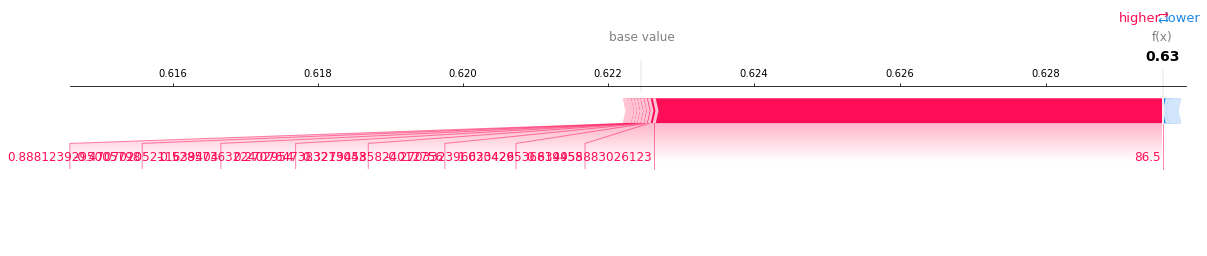

In [353]:
import matplotlib
import matplotlib.pyplot as plt
# print( shap_values_list )
# print the JS visualization code to the notebook
shap.initjs()
# print(shap_values[0, :])
# print(usable_features[0, :])
# shap.summary_plot(shap_values[:, :], usable_features[:, :])

shap.force_plot(.5, shap_values[0,:], usable_features[0, :], link = "logit", matplotlib = True)  

In [354]:
shap.force_plot(.5, shap_values[:,:], usable_features[:, :], link="logit")

In [355]:
# traits[20]
# shap_values = np.sum(shap_values_list)
# usable_features

In [356]:
# GWAS_IDS = ['ieu-b-109', 'ukb-b-12064', 'ukb-b-13806', 'ukb-d-20405_0', 'ieu-b-38', 'ukb-b-6134', 'ieu-b-110', 'ukb-b-17627', 'ukb-b-19953', 'ukb-b-8476', 'ukb-d-20405_1', 'ukb-d-20405_2', 'ukb-b-2209', 'ukb-b-4424', 'ukb-b-7663', 
#             'ukb-b-18275', 'ukb-b-770', 'met-d-Total_C', 'ieu-b-25', 'ieu-b-111', 'ukb-b-3957', 'ieu-b-39', 'ukb-b-6324',
#            'ukb-a-257','ukb-b-14699','ukb-b-323']
# # new added
# # ukb-a-257 Hearing difficulty/problems: Yes
# # ukb-b-14699 Illnesses of mother: Alzheimer's disease/dementia
# # ukb-b-323 Illnesses of father: Alzheimer's disease/dementia
GWAS_IDS=[
'ukb-b-2209',
'ieu-b-39',
'ukb-b-4424',
'ukb-b-7663',
'ukb-d-20405_2',
'ukb-b-6324',
'ieu-b-111',
'ukb-b-13806',
'ieu-b-25',
'ukb-d-20405_1',
'ukb-b-14699',
'ukb-b-770',
'ieu-b-109',
'ukb-d-20405_0',
'ieu-b-110',
'ukb-b-17627',
'ukb-a-257',
'ieu-b-38',
'ukb-b-18275',
'ukb-b-3957'   
]

# traits = ['HDL cholesterol', 'Non-cancer illness code, self-reported: depression', 
#           'Non-cancer illness code, self-reported: type 2 diabetes', 'Ever had known person concerned about, or recommend reduction of, alcohol consumption: No', 
#           'systolic blood pressure', 'Age completed full time education', 'LDL cholesterol', 
#           'Non-oily fish intake', 'Body mass index (BMI)', 'Loneliness, isolation', 
#           'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year', 
#           'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year',
#           'Oily fish intake', 'Sleep duration', 'Types of physical activity in last 4 weeks: Strenuous sports', 
#           'Hearing difficulty/problems with background noise', 'Other meat intake', 'Total cholesterol', 
#           'Cigarettes per Day', 'triglycerides', 'Sleeplessness / insomnia', 'diastolic blood pressure', 
#           'Processed meat intake','Hearing difficulty/problems: Yes','Illnesses of mother: Alzheimer\'s disease/dementia','Illnesses of father: Alzheimer\'s di



# for GWAS_ID in GWAS_IDS:
#     print(GWAS_ID)
# traits = ['HDL cholesterol', 'Non-cancer illness code, self-reported: depression', 
#           'Non-cancer illness code, self-reported: type 2 diabetes', 'Ever had known person concerned about, or recommend reduction of, alcohol consumption: No', 
#           'systolic blood pressure', 'Age completed full time education', 'LDL cholesterol', 
#           'Non-oily fish intake', 'Body mass index (BMI)', 'Loneliness, isolation', 
#           'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year', 
#           'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year',
#           'Oily fish intake', 'Sleep duration', 'Types of physical activity in last 4 weeks: Strenuous sports', 
#           'Hearing difficulty/problems with background noise', 'Other meat intake', 'Total cholesterol', 
#           'Cigarettes per Day', 'triglycerides', 'Sleeplessness / insomnia', 'diastolic blood pressure', 
#           'Processed meat intake','Hearing difficulty/problems: Yes','Illnesses of mother: Alzheimer\'s disease/dementia','Illnesses of father: Alzheimer\'s disease/dementia']

# # https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html?highlight=beeswarm#shap.summary_plot
# # usable_features_std = (usable_features - usable_features.mean(0))/usable_features.std(0)
# shap.summary_plot(shap_values, features=usable_features, feature_names=traits, plot_type='dot', max_display=len(traits))

In [ ]:
import json
# in place of json straight took it hardcoded

all_traits = json.load(open('traits_map.json', 'r'))
# print(all_traits)
GWAS_IDS = list(all_traits)
# print(GWAS_IDS)
traits = [all_traits[x] for x in all_traits]
print(len(usable_features))
# for trait in traits:
#     print(trait)
# https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html?highlight=beeswarm#shap.summary_plot
# usable_features_std = (usable_features - usable_features.mean(0))/usable_features.std(0)
shap.summary_plot(shap_values, features=usable_features, feature_names=traits, plot_type='dot', max_display=len(traits), show = False)
plt.savefig('shap/' + str(num_features) + '/summary_plot_hidden_'+ str(hidden) + '_dim_' + str(hidden_dimension) + '.pdf',  bbox_inches='tight')
# shap.summary_plot(shap_values, features=usable_features, feature_names=list(range(23)), plot_type='dot', max_display=len(traits))

1000


In [ ]:
# https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html?highlight=beeswarm#shap.summary_plot
# shap.summary_plot(shap_values, features=usable_features, feature_names=list(range(23)), plot_type='bar', max_display=len(traits), show=False)
# plt.savefig('shap/summary_plot_hidden_'+ str(hidden) + '_bar.png', bbox_inches='tight')
# naeem modified
shap.summary_plot(shap_values, features=usable_features, feature_names=list(range(num_features)), plot_type='bar', max_display=len(traits), show=False)
plt.savefig('shap/summary_plot_hidden_'+ str(hidden) + '_bar.png', bbox_inches='tight')

In [ ]:
sorted(list(zip(list(range(num_features)), abs(shap_values).mean(0))), key=lambda x:x[1], reverse=True)

In [ ]:
help(shap.force_plot)


In [ ]:

# print(Final_Samples)
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier, MLPRegressor, BernoulliRBM

feature_indices_to_consider = list(range(0, num_features)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]

usable_indices = [usable_samples_ADNI[Final_Samples[i][0]] for i in range(len(Final_Samples))]
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])

Final_Samples = positive_samples[:500] + negative_samples[:500]
random.seed(2);random.shuffle(Final_Samples)
# Final_Samples = np.array(Final_Samples)
print(len([x[1] for x in Final_Samples if x[1] == 1]), len([x[1] for x in Final_Samples if x[1] == 0]))
print(sum(usable_labels), len(usable_labels))

X_train, X_test, y_train, y_test = train_test_split(
    usable_features, usable_labels, test_size=0.1)

X_train.shape, y_train.shape

X_test.shape, y_test.shape

print(y_test.sum(), y_test.shape)
clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
# clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam').fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
random.shuffle(Final_Samples)
usable_indices = [usable_samples_ADNI[Final_Samples[i][0]] for i in range(len(Final_Samples))]
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])


from sklearn.model_selection import KFold
X = usable_features[:, :23]
y = usable_labels
kf = KFold(n_splits=10)
kf.get_n_splits(X)

print(kf)
# print(y_test)
accuracies = []
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#     clf = MLPClassifier(hidden_layer_sizes=(32,8), activation='relu', solver='adam', max_iter=100, learning_rate='invscaling').fit(X_train, y_train)
#     print(y_test.sum(), y_test.shape)
    print(clf.score(X_test, y_test))
    accuracies += [clf.score(X_test, y_test)]
print(np.mean(accuracies), np.std(accuracies))


In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

accuracies = []
X = usable_features[:, :23]
y = usable_labels
kf = KFold(n_splits=10)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = RandomForestClassifier(random_state=0)
    reg.fit(X_train, y_train)
    print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")
#     clf = MLPClassifier(hidden_layer_sizes=(32,8), activation='relu', solver='adam', max_iter=100, learning_rate='invscaling').fit(X_train, y_train)
#     print(y_test.sum(), y_test.shape)
    accuracies += [reg.score(X_test, y_test)]
print(np.mean(accuracies), np.std(accuracies))
save_in_file("Random Forest", np.mean(accuracies))

In [ ]:
# from xgboost import XGBRegressor, XGBClassifier
# model_name = "XGB"

# accuracies = []
# for train_index, test_index in kf.split(X):
# #     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     reg = XGBClassifier()
#     reg.fit(X_train, y_train)
#     print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")
# #     clf = MLPClassifier(hidden_layer_sizes=(32,8), activation='relu', solver='adam', max_iter=100, learning_rate='invscaling').fit(X_train, y_train)
# #     print(y_test.sum(), y_test.shape)
#     accuracies += [reg.score(X_test, y_test)]
# print(np.mean(accuracies), np.std(accuracies))
# save_in_file("XGBoost", np.mean(accuracies))


In [ ]:
# import csv

# # open the file in the write mode
# f = open('model_global_best_accuracy.csv', 'a')

# # create the csv writer
# writer = csv.writer(f)

# # write a row to the csv file
# # writer.writerow(['num_features','num_nn_layers','global_best_accuracy'])
# writer.writerow([str(num_features),str(hidden),str(global_best_acc_val)])

# # close the file
# f.close()